Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*The "Students' Performance in Exams" dataset contains American high school students' demographic information (e.g. gender, race/ethnicity, parental level of education, whether or not they qualify for free/reduced lunch, and whether or not they took test prep courses) as well as their test scores in math, reading, and writing. I want to see if I can predict students' math and reading scores using variables such as gender, race/ethnicity, and parental level of education.*
 


*******************
*******************
# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

*******************
*******************
# **Functions used in notebook**

*Wrote functions to: create visualizations (boxplots, countplots, testing data, residual plots), get the multivariate linear regression equations, and remove outliers from the dataset*

In [ ]:
# Functions that you develop
def boxplot_viz(df, subject):
  """
  purpose: creates boxplots for the gender, race/ethnicity, and parental level of education on the x-axis and the subject scores as the y-axis
  
  inputs:
  df = a dataframe
  subject = math or reading
  """
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[35,10])
  sns.boxplot(data=df, x='gender', y=subject, ax=axes[0]) # left boxplot
  sns.boxplot(data=df, x='race/ethnicity', y=subject, ax=axes[1]) # middle boxplot
  sns.boxplot(data=df, x='parental level of education', y=subject, ax=axes[2]) # right boxplot
  plt.tight_layout()

def countplot_viz(df):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[35,10])
  sns.countplot(data=df, x='gender', ax=axes[0]) # left countplot
  sns.countplot(data=df, x='race/ethnicity', ax=axes[1]) # middle countplot
  sns.countplot(data=df, x='parental level of education', ax=axes[2]) # right countplot

  plt.tight_layout()

def model_viz(X,y):
  """
  purpose of function: find out how well different features in X predict y and creates a plot for the features

  inputs: 
  X = features from the dataframe (the x values; gender, race/ethnicity, parental level of education)
  y = the target data (the y values; math or reading scores)
  """
  # splits the X and y into train and test using the train_test_split method
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.66)
  
  # fits a linear regression model to the training X and training y data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # gets the predicted y data for X test from the model
  y_predicted = model.predict(X_test)

  # gets and prints the model fit (R^2)
  training_r_sqr = model.score(X_train, y_train) # for training data
  testing_r_sqr = model.score(X_test, y_test) # for testing data
  print('Training R^2:', training_r_sqr)
  print('Testing R^2:', testing_r_sqr)
    
  # creates scatterplot(s)
  fig, axes = plt.subplots(nrows=1, ncols=X_train.shape[1],figsize=[35,5])

  if X_train.shape[1] == 1: # when 1 column of data is passed
    # create a scatterplot and lineplot for testing data
    sns.scatterplot(x = X_test[X_test.columns[0]],y = y_test,ax=axes).set_title('Testing Data')
    sns.lineplot(x = X_test[X_test.columns[0]],y = y_predicted,ax=axes, color='r')
    return 
  else: # when more than 1 column is passed
     for i in range(X_train.shape[1]):  
      # create a scatterplot and lineplot for testing data
      sns.scatterplot(x = X_test[X_test.columns[i]],y = y_test,ax=axes[i])
      sns.lineplot(x = X_test[X_test.columns[i]],y = y_predicted,ax=axes[i], color='r')

  plt.suptitle('Testing Data')
  plt.tight_layout(pad=3)

def model_residual(X,y):
  """
  purpose of function: find out how well different the y predicted values are from the actual y values and creates a residual scatterplot

  inputs:
  X = features from the dataframe (the x values; gender, race/ethnicity, parental level of education)
  y = the target data (the y values; math or reading scores)
  """
  # splits the X and y into train and test using the train_test_split method
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.66)
  
  # fits a linear regression model to the training X and training y data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # gets the predicted y data for X test from the model
  y_predicted = model.predict(X_test)

  # the min and max values of the predicted y values - used to create the lineplot
  y_min = np.floor(y_predicted.min())
  y_max = np.ceil(y_predicted.max())

  # created a scatterplot of residuals
  sns.scatterplot(x=y_predicted, y=y_predicted-y_test)
  sns.lineplot([y_min, y_max], [0,0], color='r')

def model_equation(X,y):
  """
  purpose of function: create the equation to predict the math or reading scores

  inputs: 
  X = features from the dataframe (the x values; gender, race/ethnicity, parental level of education)
  y = the target data (the y values; math or reading scores)
  """
  # splits the X and y into train and test using the train_test_split method
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.66)
  
  # fits a linear regression model to the training X and training y data
  model = LinearRegression()
  model.fit(X_train, y_train)

  mx = ' '

  if X_train.shape[1] == 1: # when 1 column is passed
    # get the slope(model.coef_), the name of the column, and the y-int (model.intercept_)
    mx =  str(np.round(model.coef_,3)) + '*' + '(' + X_test.columns[0] + ')'
    # return a y = b0 + b1X1 equation
    return 'y =' + str(mx) + '+ ' + str(np.round(model.intercept_,3))
  else: # when more than 1 column is passed
     for i in range(X_train.shape[1]):
        # get the slope(model.coef_) for each column, the name of each column, and the y-int (model.intercept_)
        mx =  mx + ' ' + str(np.round(model.coef_[i],3))+ '*' + '(' + X_test.columns[i] + ')' + ' + '
  # return a y = b0 + b1X1 + b2X2... equation
  return 'y =' + str(mx) + str(np.round(model.intercept_,3))

def remove_outliers(df, column):
  """
  purpose: removes outliers from the dataframe using the std deviation method

  df = a dataframe
  column = a column from the dataframe 
  """
  # values 2.5 times greater than or less than the mean are outliers
  upper_threshold = df[column].mean() + (2.5*df[column].std())
  lower_threshold = df[column].mean() - (2.5*df[column].std())

  # drops the rows w/ outliers from the dataframe
  df.drop(df[(df[column] > upper_threshold) | (df[column] < lower_threshold)].index, inplace=True)

  # resets the index of the dataframe
  df = df.reset_index(drop=True)
  
  # prints a message after the function has ran
  print('Outliers have been removed in', column)
  

*******************
*******************
# **Getting data**

*Downloaded the data in csv from here: https://www.kaggle.com/spscientist/students-performance-in-exams*

In [ ]:
# Code for acquiring data
studentperf_df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Display first 5 rows of data
studentperf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Display last 5 rows of data
studentperf_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Show data.info
studentperf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Show data.describe
studentperf_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

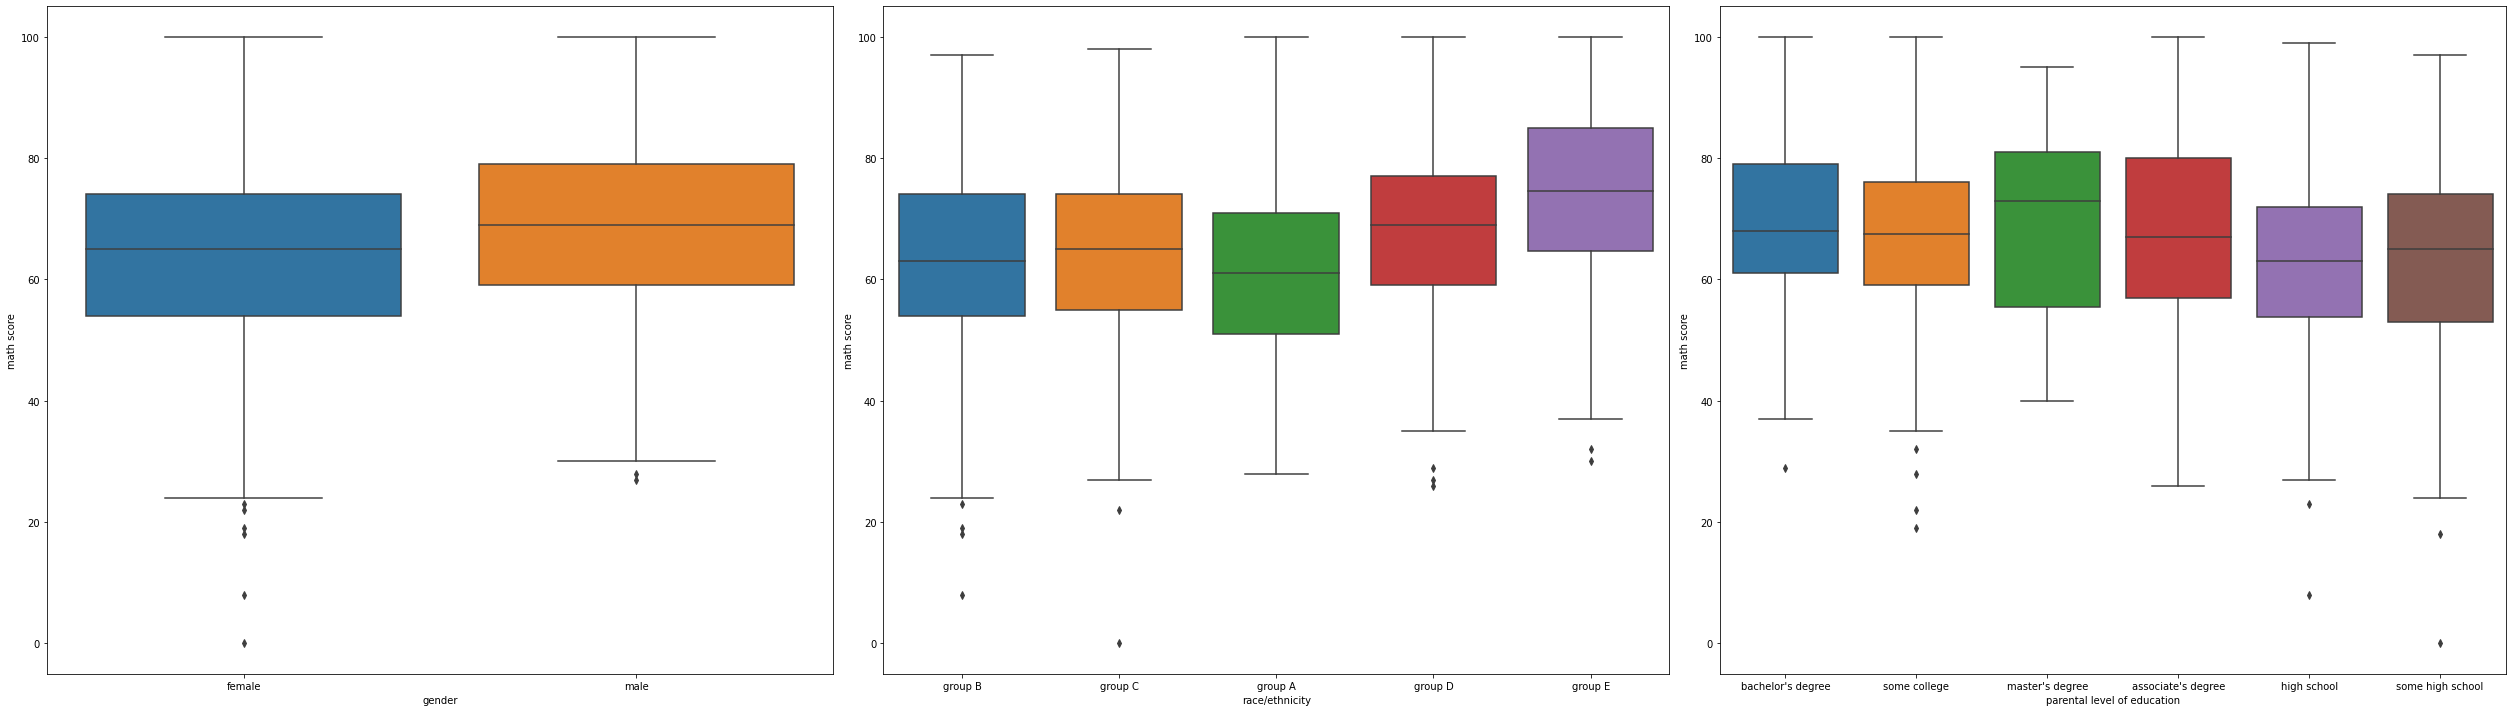

In [ ]:
# visualization 1
# boxplots for math score + 3 variables (gender, race/ethnicity, and parental level of education)
boxplot_viz(studentperf_df,'math score')

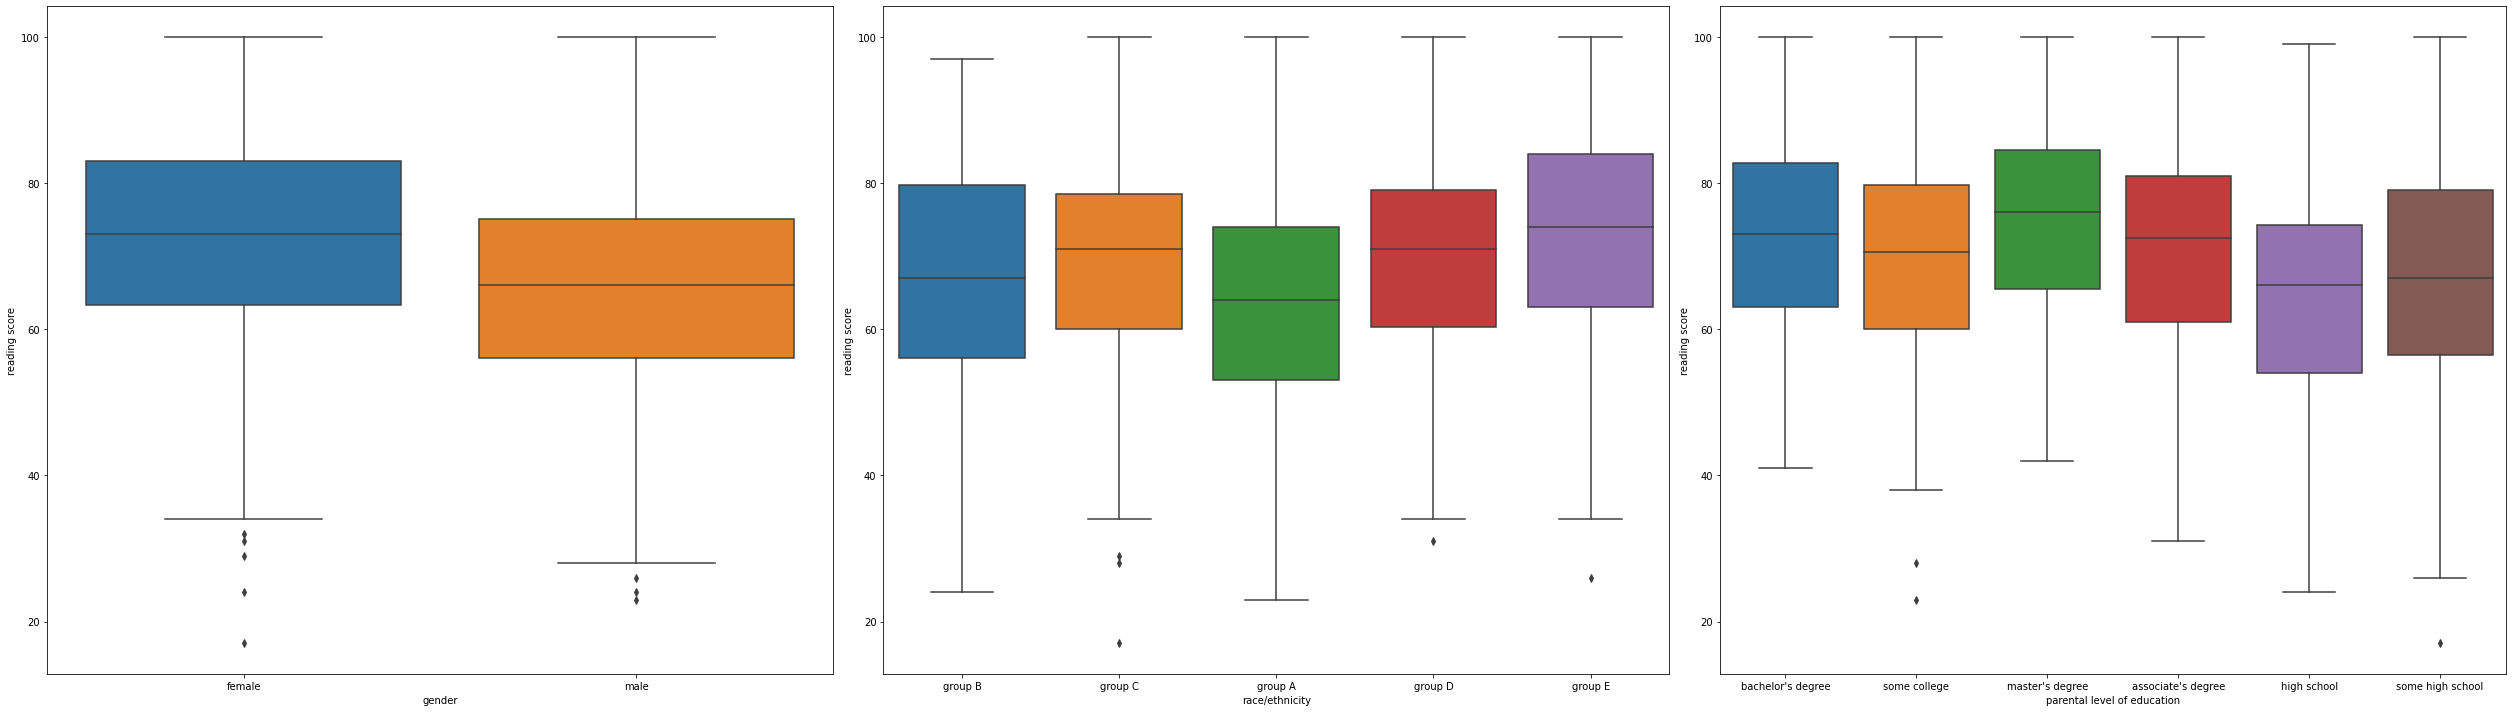

In [ ]:
# visualization 2
# boxplot for reading scores + 3 variables (gender, race/ethnicity, and parental level of education)
boxplot_viz(studentperf_df,'reading score')

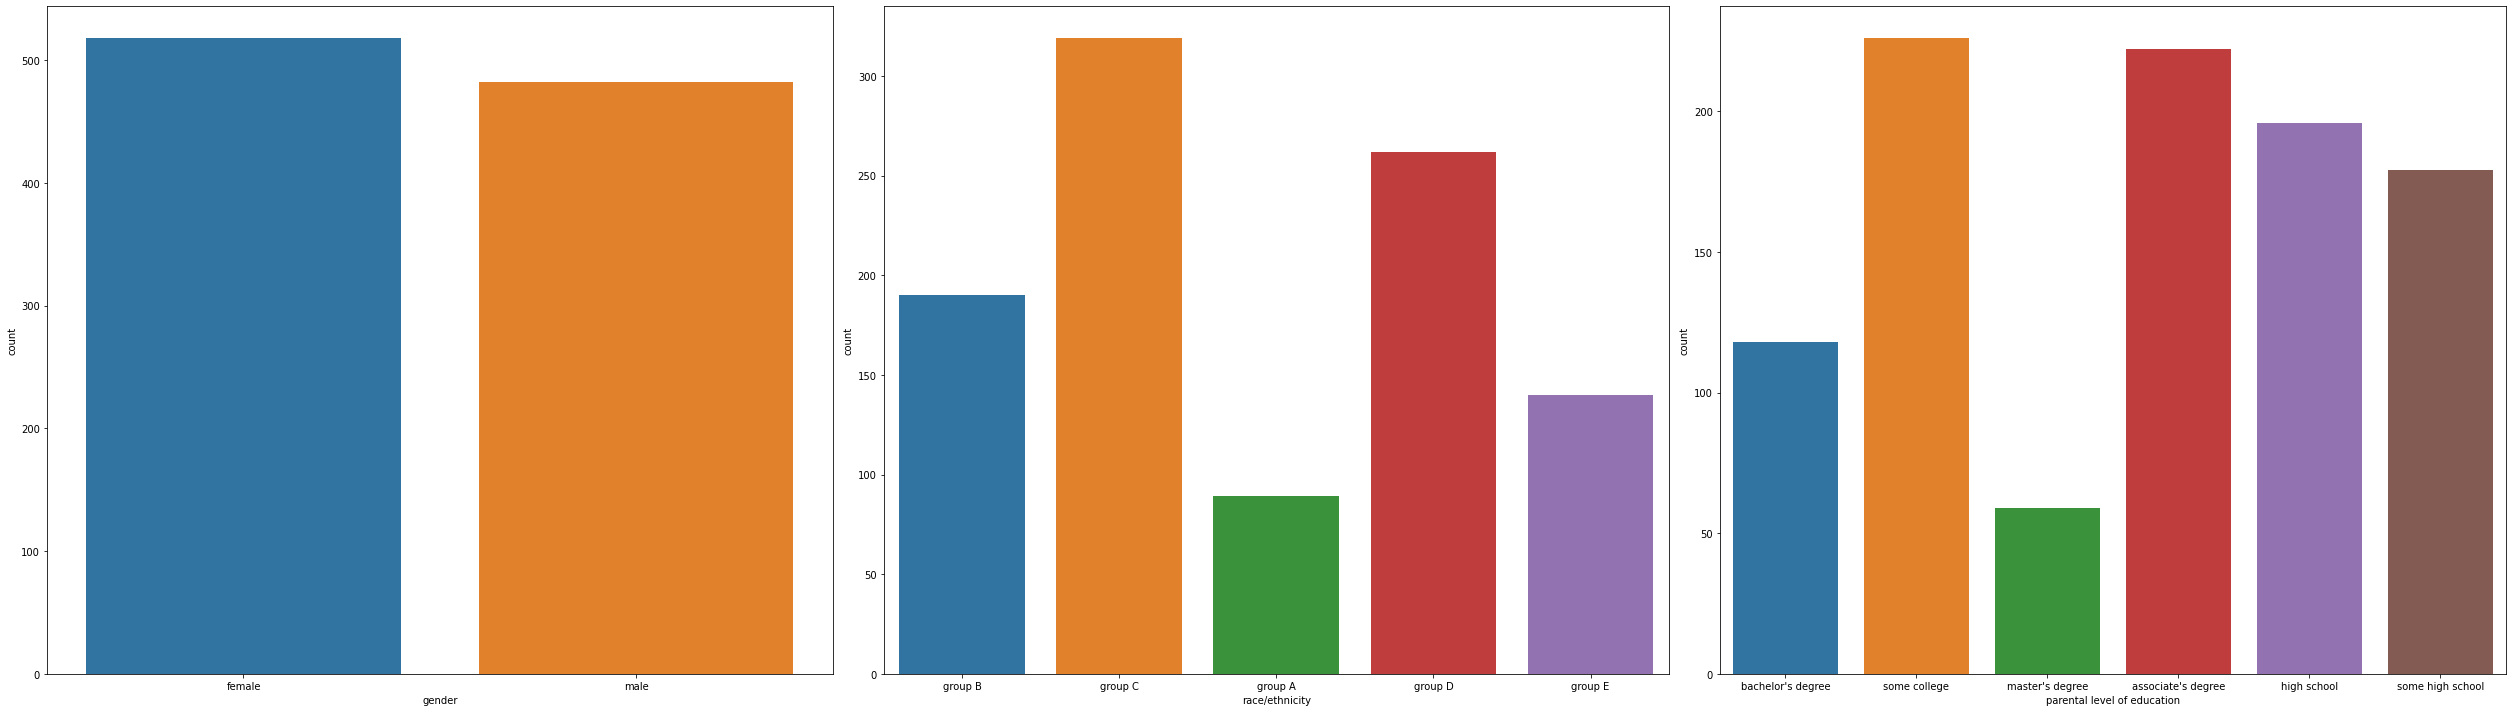

In [ ]:
# visualization 3
# countplots for the 3 variables (gender, race/ethnicity, and parental level of education)
countplot_viz(studentperf_df)

Training R^2: 0.11673023532395421
Testing R^2: 0.07369301598903455


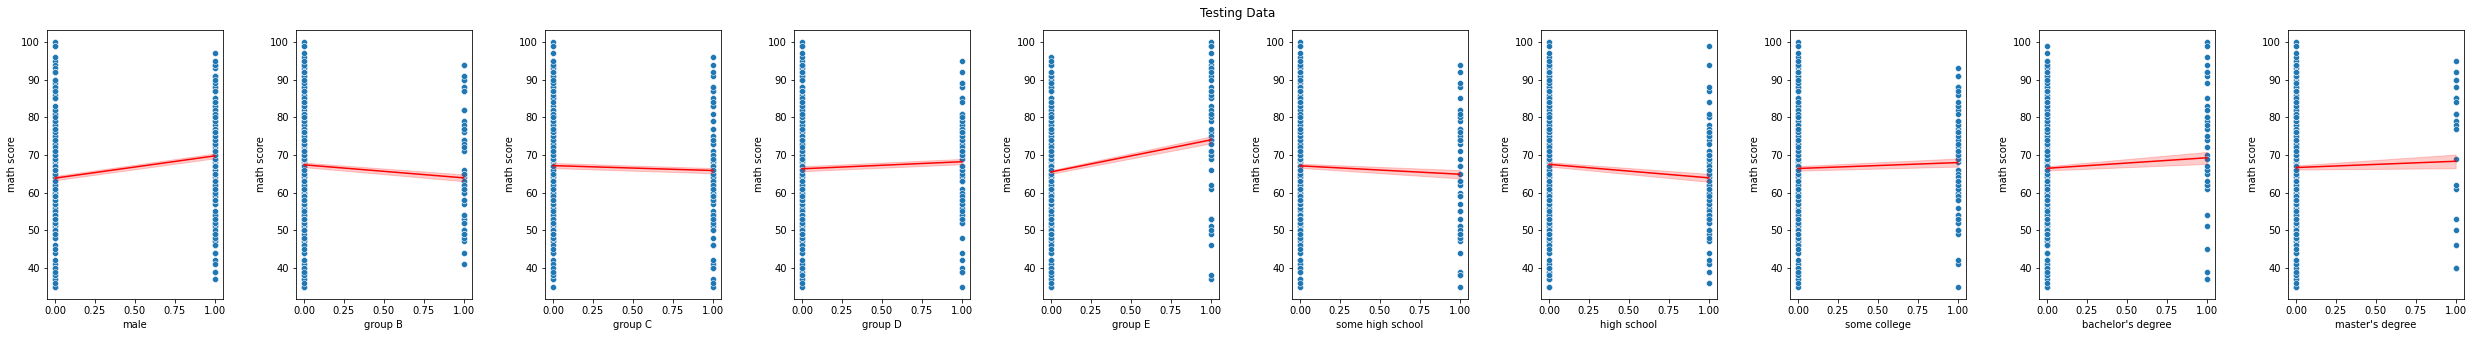

In [ ]:
# visualization 4
# the testing data subplots for each column of interest - need to run last block in the feature engineering section (that's where the dummy coded data frame is coded)
model_viz(studentperf_dummy_df[['male','group B','group C', 'group D', 'group E', 'some high school','high school','some college',"bachelor's degree","master's degree"]], studentperf_dummy_df['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


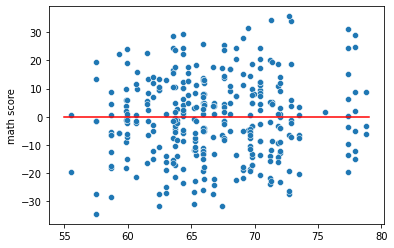

In [ ]:
# visualization 5
# residual plot for math score - need to run last block in the feature engineering section (that's where the dummy coded data frame is coded)
model_residual(studentperf_dummy_df[['male','group B','group C', 'group D', 'group E', 'some high school','high school','some college',"bachelor's degree","master's degree"]], studentperf_dummy_df['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


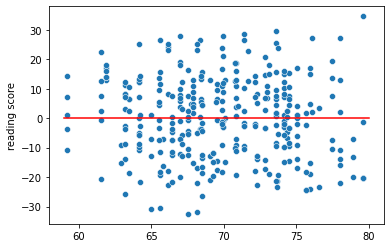

In [ ]:
# visualization 6
# residual plot for reading score - need to run last block in the feature engineering section (that's where the dummy coded data frame is coded)
model_residual(studentperf_dummy_df[['male','group B','group C', 'group D', 'group E', 'some high school','high school','some college',"bachelor's degree","master's degree"]], studentperf_dummy_df['reading score'])

***************
***************
# **Feature Engineering**

*I have already dummy coding the gender (M/F), race/ethncity (Group A-E), and parental level of education columns (from some high school to master's degree)*


In [ ]:
# Check and take care of null values
print('Are there any NaNs?', studentperf_df.isnull().values.any())

Are there any NaNs? False


In [ ]:
# Check and take care of string values
# for a column in the dataframe
for i in studentperf_df.columns:
  # if the first value is an integer, print that the column values are integers
  if isinstance(studentperf_df[i][0], np.int64) == 1:
    print(i, 'values are integers')
  # if the first value is a string, print that the column values are strings
  elif isinstance(studentperf_df[i][0], str) == 1:
    print(i, 'values are strings')
  else:
    print(i, 'values are', type(studentperf_df[i][0]))

gender values are strings
race/ethnicity values are strings
parental level of education values are strings
lunch values are strings
test preparation course values are strings
math score values are integers
reading score values are integers
writing score values are integers


In [ ]:
# Check and take care of outliers
# outliers are values that are more than 2 standard deviations from the mean
for i in studentperf_df.columns: 
  # if the first value is an integer
  if isinstance(studentperf_df[i][0], np.int64) == 1:
    # run the remove_outliers function
    remove_outliers(studentperf_df, i)
print(len(studentperf_df)) # prints the length of the dataframe w/o outliers

Outliers have been removed in math score
Outliers have been removed in reading score
Outliers have been removed in writing score
978


In [ ]:
# Any additional feature engineering

# check and take care of duplicates
studentperf_df = studentperf_df.drop_duplicates(ignore_index=True)
print('Are there any duplicates?:', studentperf_df.duplicated().any())

# dummy code gender, race/ethnicity, and parental level of education
studentperf_dummy_df = pd.get_dummies(studentperf_df, drop_first=True)

# renamed the columns of the dataframe
studentperf_dummy_df.columns = ['math score', 'reading score', 'writing score', 'male', 'group B', 'group C', 'group D', 'group E', "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school', 'lunch_standard', 'test preparation_none']

Are there any duplicates?: False


# **NEXT STEPS**
*For feature engineering, I have already dummy coded the 3 columns (gender, race/ethnicity, and parental level of education) and have written a function that gets rid of outliers in the dataframe. For analysis, I plan to do a multivariate linear regression and have began that process (the training and testing R^2 values are quite low). I also plan to use the equations from the linear regression to make predictions of students' math and reading scores based on their gender, race/ethnicity, and parental level of education (e.g. find the math and reading scores of someone who is a female, belongs to group C, and whose parent has a bachelor's degree).*

***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

In [ ]:
# Machine Learning 1

scores_list = ['math score', 'reading score']
# the equations in which I will use to find the predicted values
for i in scores_list:
  print(i,'equation:',model_equation(studentperf_dummy_df[['male','group B','group C', 'group D', 'group E', 'some high school','high school','some college',"bachelor's degree","master's degree"]], studentperf_dummy_df[i]))


math score equation: y =  6.026*(male) +  4.959*(group B) +  4.327*(group C) +  6.601*(group D) +  12.79*(group E) +  -1.944*(some high school) +  -5.675*(high school) +  -0.145*(some college) +  -0.577*(bachelor's degree) +  1.494*(master's degree) + 59.262
reading score equation: y =  -6.679*(male) +  3.928*(group B) +  3.868*(group C) +  5.41*(group D) +  7.782*(group E) +  -1.962*(some high school) +  -5.394*(high school) +  -0.813*(some college) +  0.563*(bachelor's degree) +  1.835*(master's degree) + 69.891


In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*